# Importação das Bibliotecas

In [42]:
#bibliotecas para manipulação de dados
import numpy as np
import pandas as pd

#modelos Aprendizado de Máquina
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


#bibliotecas para seleção de features e parâmetros
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#bibliotecas para validação
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, make_scorer
from sklearn.metrics import balanced_accuracy_score


# Preparação dos Dados

In [43]:
df = pd.read_csv('dataset_4.csv', sep=',')

In [44]:
df_remove = df.loc[(df[' timedelta']<=21)]

In [45]:
df = df.drop(df_remove.index)

In [46]:
df.dropna()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39011,http://mashable.com/2014/12/16/game-of-thrones...,22.0,14.0,279.0,0.612546,1.0,0.814815,5.0,3.0,1.0,...,0.136364,0.8,-0.216667,-0.300,-0.100000,0.000000,0.000000,0.500000,0.000000,469
39012,http://mashable.com/2014/12/16/good-samaritans...,22.0,13.0,376.0,0.542466,1.0,0.684685,3.0,1.0,1.0,...,0.100000,0.3,-0.306250,-0.600,-0.125000,0.000000,0.000000,0.500000,0.000000,682
39013,http://mashable.com/2014/12/16/grammy-hall-of-...,22.0,12.0,514.0,0.492095,1.0,0.682927,3.0,3.0,0.0,...,0.100000,1.0,-0.153846,-0.250,-0.076923,0.500000,0.200000,0.000000,0.200000,1400
39014,http://mashable.com/2014/12/16/grand-theft-aut...,22.0,15.0,333.0,0.601208,1.0,0.769608,7.0,3.0,1.0,...,0.050000,0.4,-0.355556,-0.500,-0.166667,0.000000,0.000000,0.500000,0.000000,790


In [47]:
for x in range(16):
  df = df.drop(39000 + x)

In [48]:
df.dropna()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.6000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.1250,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.8000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.6000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.5000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38995,http://mashable.com/2014/12/16/broad-city-trai...,22.0,13.0,558.0,0.551471,1.0,0.759644,7.0,5.0,3.0,...,0.100000,0.6,-0.313194,-0.6000,-0.125000,0.000000,0.000000,0.500000,0.000000,1300
38996,http://mashable.com/2014/12/16/carbon-dioxide-...,22.0,11.0,297.0,0.612100,1.0,0.693069,18.0,1.0,1.0,...,0.033333,0.5,-0.275000,-0.5000,-0.050000,0.666667,-0.700000,0.166667,0.700000,1000
38997,http://mashable.com/2014/12/16/cavaliers-outle...,22.0,9.0,961.0,0.472193,1.0,0.705104,11.0,2.0,1.0,...,0.033333,1.0,-0.307242,-0.6000,-0.050000,0.000000,0.000000,0.500000,0.000000,4100
38998,http://mashable.com/2014/12/16/ces-mashbash/,22.0,12.0,179.0,0.672316,1.0,0.798165,3.0,3.0,1.0,...,0.100000,0.8,-0.312500,-0.3125,-0.312500,0.535714,0.285714,0.035714,0.285714,3800


In [49]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [50]:
y = df[' shares']
x = df.iloc[:,2:60]
print(len(y))
print(len(x))

39000
39000


In [51]:
type(y)

pandas.core.series.Series

In [52]:
x.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' gl

In [53]:
y

0         593
1         711
2        1500
3        1200
4         505
         ... 
38995    1300
38996    1000
38997    4100
38998    3800
38999     687
Name:  shares, Length: 39000, dtype: int64

# Criação das Classes

In [54]:
saida_lista= []
for i in y:
    if i > 1400:
        saida_lista.append(1)
    else:
        saida_lista.append(0)
    
    

In [55]:
saida_lista

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,


In [56]:
saida = pd.Series(saida_lista)
type(saida)

pandas.core.series.Series

In [57]:
saida

0        0
1        0
2        1
3        0
4        0
        ..
38995    0
38996    0
38997    1
38998    1
38999    0
Length: 39000, dtype: int64

In [59]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, saida, test_size=0.3)

# Grid Search

In [27]:
lista_k = [1,3,5,10,20]
lista_t = [10,20,50,100,200,400]
lista_c = [1,2,4,8,16,32,64]
print(lista_k)

[1, 3, 5, 10, 20]


In [28]:
knn = KNeighborsClassifier()
gnb = GaussianNB()
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7)

rf = RandomForestClassifier(random_state=1986,
                           criterion='gini',
                           max_depth=10,
                           n_estimators=50,
                           n_jobs=-1)

ada = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=1986)

print('knn: ' + str(knn.get_params().keys()))
print()
print('gnb: ' + str(gnb.get_params().keys()))
print()
print('rbf: ' + str(rbf_svc.get_params().keys()))
print()
print('rf: ' + str(rf.get_params().keys()))
print()
print('ada: ' + str(ada.get_params().keys()))




knn: dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

gnb: dict_keys(['priors', 'var_smoothing'])

rbf: dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

rf: dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

ada: dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])


In [29]:
parametros_grid = dict(n_neighbors=lista_k)
parametros_rf = dict(n_estimators=lista_t)
parametros_rbf = dict(C=lista_c)
print(parametros_grid)
print(parametros_rf)
print(parametros_rbf)

{'n_neighbors': [1, 3, 5, 10, 20]}
{'n_estimators': [10, 20, 50, 100, 200, 400]}
{'C': [1, 2, 4, 8, 16, 32, 64]}


# KNN

In [30]:
grid = GridSearchCV(knn,parametros_grid,cv=10)

In [31]:
x_treino = x_treino.dropna()
y_treino = y_treino.dropna()

In [32]:
grid.fit(x_treino,y_treino)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 10, 20]})

In [26]:
grid.best_params_

{'n_neighbors': 20}

In [33]:
grid.best_score_

0.5685045045045045

# Naive Bayes

# SVM

In [ ]:
grid = GridSearchCV(rbf_svc,parametros_rbf,cv=10)

x_treino = x_treino.dropna()
y_treino = y_treino.dropna()




In [ ]:
grid.fit(x_treino,y_treino)

In [ ]:
grid.best_params_


In [ ]:
grid.best_score_

# Random Forest

In [ ]:
grid = GridSearchCV(rf,parametros_rf,cv=10)

x_treino = x_treino.dropna()
y_treino = y_treino.dropna()




In [ ]:
grid.fit(x_treino,y_treino)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

# AdaBoost

# Treinamento e Validação KNN

In [92]:
knn = KNeighborsClassifier(n_neighbors=20,p=2)
W = 10000
L = 1000
idxW = 0
idxL = idxW + W + 1

x_treino = x.iloc[idxW:W,:]
y_treino = saida.iloc[idxW:W]
x_teste =   x.iloc[idxL:(idxL+L),:]
y_teste =  saida.iloc[idxL:(idxL+L)]  
knn.fit(x_treino,y_treino)
prev_knn = knn.predict(x_teste)

idxW = idxW + L
W = idxW + 10000
idxL = idxW + 10000 + 1

for cont in range(28):
  x_treino = x.iloc[idxW:W,:]
  y_treino = saida.iloc[idxW:W]
  x_teste =   x.iloc[idxL:(idxL+L),:]
  y_teste_1 =  saida.iloc[idxL:(idxL+L)]  
  knn.fit(x_treino,y_treino)
  prev_knn_1 = knn.predict(x_teste)
  y_teste = pd.concat([y_teste,y_teste_1])  
  prev_knn = pd.concat([pd.DataFrame(prev_knn),pd.DataFrame(prev_knn_1)])
  idxW = idxW + L
  W = idxW + 10000
  idxL = idxW + 10000 + 1



    
print('idxW = ',idxW)
print('W = ',W)
print('idxL = ',idxL)
# https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report
print(classification_report(y_teste, prev_knn))



idxW =  29000
W =  39000
idxL =  39001
              precision    recall  f1-score   support

           0       0.57      0.72      0.64     15041
           1       0.58      0.42      0.49     13958

    accuracy                           0.58     28999
   macro avg       0.58      0.57      0.56     28999
weighted avg       0.58      0.58      0.57     28999



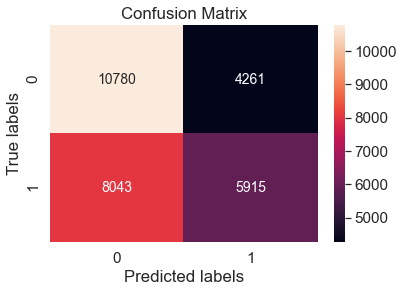

In [93]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

ax= plt.subplot()
array = confusion_matrix(y_teste, prev_knn)      
df_cm = pd.DataFrame(array, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 14}, ax = ax,fmt="d")# font size

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['Não Popular', 'Popular']); ax.yaxis.set_ticklabels(['Não Popular', 'Popular']);

In [100]:
gnb = GaussianNB()
W = 10000
L = 1000
idxW = 0
idxL = idxW + W + 1

x_treino = x.iloc[idxW:W,:]
y_treino = saida.iloc[idxW:W]
x_teste =   x.iloc[idxL:(idxL+L),:]
y_teste =  saida.iloc[idxL:(idxL+L)]  
gnb.fit(x_treino,y_treino)
prev_gnb = gnb.predict(x_teste)

idxW = idxW + L
W = idxW + 10000
idxL = idxW + 10000 + 1

for cont in range(1):
  x_treino = x.iloc[idxW:W,:]
  y_treino = saida.iloc[idxW:W]
  x_teste =   x.iloc[idxL:(idxL+L),:]
  y_teste_1 =  saida.iloc[idxL:(idxL+L)]  
  gnb.fit(x_treino,y_treino)
  prev_gnb_1 = gnb.predict(x_teste)
  y_teste = pd.concat([y_teste,y_teste_1])  
  prev_knn = pd.concat([pd.DataFrame(prev_gnb),pd.DataFrame(prev_gnb_1)])
  idxW = idxW + L
  W = idxW + 10000
  idxL = idxW + 10000 + 1



    
print('idxW = ',idxW)
print('W = ',W)
print('idxL = ',idxL)
# https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report
print(classification_report(y_teste, prev_gnb))

idxW =  2000
W =  12000
idxL =  12001


ValueError: Found input variables with inconsistent numbers of samples: [2000, 1000]

In [60]:





gnb.fit(x_treino,y_treino)


rbf_svc = svm.SVC(kernel='rbf', gamma=0.7)
rbf_svc.fit(x_treino,y_treino)


rf = RandomForestClassifier(random_state=1986,
                           criterion='gini',
                           max_depth=10,
                           n_estimators=50,
                           n_jobs=-1)
rf.fit(x_treino,y_treino)


ada = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=1986)
ada.fit(x_treino,y_treino)

AdaBoostClassifier(learning_rate=1, random_state=1986)

# Validação

In [61]:

labels_gnb = gnb.predict(x_teste)
labels_rbf_svc = rbf_svc.predict(x_teste)
labels_rf = rf.predict(x_teste)
labels_ada = ada.predict(x_teste)

In [62]:
print('Acurácia KNN:{}'.format(round(accuracy_score(y_teste, labels_knn),2)))
print('Acurácia GNB:{}'.format(round(accuracy_score(y_teste, labels_gnb),2)))
print('Acurácia SVM:{}'.format(round(accuracy_score(y_teste, labels_rbf_svc),2)))
print('Acurácia RF:{}'.format(round(accuracy_score(y_teste, labels_rf),2)))
print('Acurácia ADA:{}'.format(round(accuracy_score(y_teste, labels_ada),2)))
print('Acurácia ADA:{}'.format(round(balanced_accuracy_score(y_teste, labels_ada),2)))


Acurácia KNN:0.57
Acurácia GNB:0.53
Acurácia SVM:0.51
Acurácia RF:0.67
Acurácia ADA:0.66
Acurácia ADA:0.66


In [63]:
# https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report
print(classification_report(y_teste, labels_knn))


              precision    recall  f1-score   support

           0       0.57      0.67      0.62      5986
           1       0.58      0.47      0.52      5719

    accuracy                           0.57     11705
   macro avg       0.57      0.57      0.57     11705
weighted avg       0.57      0.57      0.57     11705



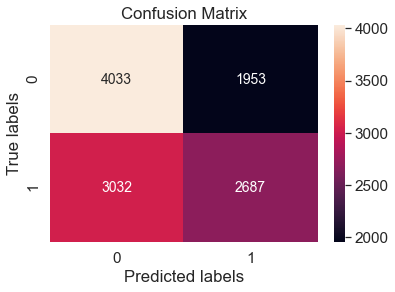

In [64]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

ax= plt.subplot()
array = confusion_matrix(y_teste, labels_knn)      
df_cm = pd.DataFrame(array, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 14}, ax = ax,fmt="d")# font size

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['Não Popular', 'Popular']); ax.yaxis.set_ticklabels(['Não Popular', 'Popular']);

In [65]:
print(classification_report(y_teste, labels_gnb))

              precision    recall  f1-score   support

           0       0.52      0.95      0.67      5986
           1       0.64      0.09      0.16      5719

    accuracy                           0.53     11705
   macro avg       0.58      0.52      0.42     11705
weighted avg       0.58      0.53      0.42     11705



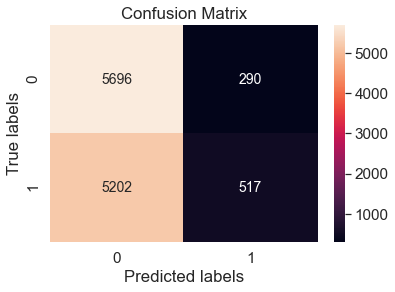

In [66]:
ax= plt.subplot()
array = confusion_matrix(y_teste, labels_gnb)      
df_cm = pd.DataFrame(array, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 14}, ax = ax,fmt="d")# font size

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [67]:
print(classification_report(y_teste, labels_rbf_svc))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68      5986
           1       0.00      0.00      0.00      5719

    accuracy                           0.51     11705
   macro avg       0.26      0.50      0.34     11705
weighted avg       0.26      0.51      0.35     11705



c:\users\loyol\pycharmprojects\curso_covid\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


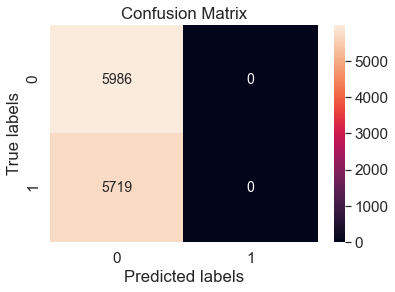

In [68]:
ax= plt.subplot()
array = confusion_matrix(y_teste, labels_rbf_svc)      
df_cm = pd.DataFrame(array, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 14}, ax = ax,fmt="d")# font size

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [69]:
print(classification_report(y_teste, labels_rf))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      5986
           1       0.65      0.67      0.66      5719

    accuracy                           0.67     11705
   macro avg       0.67      0.67      0.67     11705
weighted avg       0.67      0.67      0.67     11705



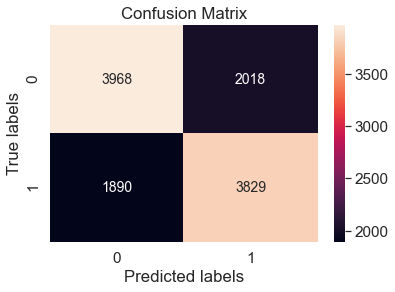

In [70]:
ax= plt.subplot()
array = confusion_matrix(y_teste, labels_rf)      
df_cm = pd.DataFrame(array, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 14}, ax = ax,fmt="d")# font size

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [71]:
print(classification_report(y_teste, labels_ada))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      5986
           1       0.65      0.66      0.65      5719

    accuracy                           0.66     11705
   macro avg       0.66      0.66      0.66     11705
weighted avg       0.66      0.66      0.66     11705



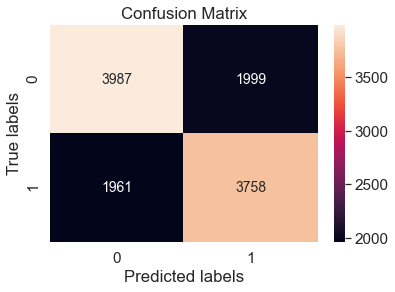

In [72]:
ax= plt.subplot()
array = confusion_matrix(y_teste, labels_ada)      
df_cm = pd.DataFrame(array, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 14}, ax = ax,fmt="d")# font size

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

# Validação Cruzada

In [73]:
originalclass = []
predictedclass = []

def classification_report_with_accuracy_score(y_true, y_pred):

    #print (classification_report(y_true, y_pred)) # print classification report
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

In [74]:
knn_score = cross_val_score(knn, X=x_teste, y=y_teste, cv=10, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print(classification_report(originalclass, predictedclass)) 
print (knn_score )

              precision    recall  f1-score   support

           0       0.56      0.70      0.62      5986
           1       0.58      0.44      0.50      5719

    accuracy                           0.57     11705
   macro avg       0.57      0.57      0.56     11705
weighted avg       0.57      0.57      0.56     11705

[0.54654142 0.58582408 0.5704526  0.55081127 0.57813834 0.55982906
 0.59230769 0.5965812  0.56752137 0.55213675]


In [75]:
originalclass = []
predictedclass = []

gnb_score = cross_val_score(gnb, X=x_teste, y=y_teste, cv=10, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print(classification_report(originalclass, predictedclass)) 
print (gnb_score )

              precision    recall  f1-score   support

           0       0.56      0.75      0.64      5986
           1       0.60      0.39      0.48      5719

    accuracy                           0.58     11705
   macro avg       0.58      0.57      0.56     11705
weighted avg       0.58      0.58      0.56     11705

[0.58070026 0.59863365 0.57728437 0.59094791 0.58070026 0.58205128
 0.56581197 0.55982906 0.54700855 0.57692308]


In [76]:
originalclass = []
predictedclass = []

rbf_svc_score = cross_val_score(rbf_svc, X=x_teste, y=y_teste, cv=10, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print(classification_report(originalclass, predictedclass)) 
print (rbf_svc_score )

              precision    recall  f1-score   support

           0       0.51      1.00      0.68      5986
           1       0.00      0.00      0.00      5719

    accuracy                           0.51     11705
   macro avg       0.26      0.50      0.34     11705
weighted avg       0.26      0.51      0.35     11705

[0.51152861 0.51152861 0.51152861 0.51152861 0.51152861 0.51111111
 0.51111111 0.51111111 0.51111111 0.51196581]


c:\users\loyol\pycharmprojects\curso_covid\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
originalclass = []
predictedclass = []

rf_score = cross_val_score(rf, X=x_teste, y=y_teste, cv=10, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print(classification_report(originalclass, predictedclass)) 
print (rf_score )

              precision    recall  f1-score   support

           0       0.66      0.68      0.67      5986
           1       0.66      0.64      0.65      5719

    accuracy                           0.66     11705
   macro avg       0.66      0.66      0.66     11705
weighted avg       0.66      0.66      0.66     11705

[0.66097353 0.66011956 0.68317677 0.676345   0.66353544 0.65128205
 0.65299145 0.63931624 0.66324786 0.64871795]


In [78]:
originalclass = []
predictedclass = []

ada_score = cross_val_score(ada, X=x_teste, y=y_teste, cv=10, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print(classification_report(originalclass, predictedclass)) 
print (ada_score )

              precision    recall  f1-score   support

           0       0.66      0.67      0.67      5986
           1       0.65      0.64      0.65      5719

    accuracy                           0.66     11705
   macro avg       0.66      0.66      0.66     11705
weighted avg       0.66      0.66      0.66     11705

[0.65157985 0.65499573 0.67292912 0.67805295 0.67207515 0.66068376
 0.64871795 0.63931624 0.65897436 0.63247863]


# Persistência


In [83]:
 import joblib

In [84]:
joblib.dump(knn,'knn_model')
joblib.dump(gnb,'gnb_model')
joblib.dump(rbf_svc,'svm_model')
joblib.dump(rf,'rf_model')
joblib.dump(ada,'ada_model')


['ada_model']

In [85]:
model = joblib.load('knn_model')
resultados = model.predict(x_teste)

In [86]:
print(resultados)

[1 0 0 ... 0 1 1]
